In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report,confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

df=pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2]:
df=df.sample(frac=1).reset_index(drop=True)

In [3]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,12414,Male,76.0,1,0,Yes,Private,Rural,80.15,34.9,formerly smoked,0
1,34999,Male,26.0,0,0,Yes,Private,Urban,89.18,25.9,formerly smoked,0
2,57137,Male,65.0,0,0,Yes,Private,Urban,59.87,28.5,smokes,0
3,59164,Female,24.0,0,0,No,Private,Urban,70.32,20.5,Unknown,0
4,13859,Female,31.0,0,0,No,Private,Urban,102.39,22.9,smokes,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,54371,Male,78.0,0,0,Yes,Govt_job,Urban,143.47,27.6,formerly smoked,0
5106,9179,Female,32.0,0,0,No,Private,Urban,74.20,23.0,smokes,0
5107,20129,Male,51.0,0,0,Yes,Private,Rural,78.29,30.8,never smoked,0
5108,51762,Female,59.0,0,0,Yes,Private,Rural,134.24,28.8,Unknown,0


In [4]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
df=df[~ (df.smoking_status=="Unknown")]

In [6]:
df.drop("id",axis=1,inplace=True)
df

C:\Users\berka\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,76.0,1,0,Yes,Private,Rural,80.15,34.9,formerly smoked,0
1,Male,26.0,0,0,Yes,Private,Urban,89.18,25.9,formerly smoked,0
2,Male,65.0,0,0,Yes,Private,Urban,59.87,28.5,smokes,0
4,Female,31.0,0,0,No,Private,Urban,102.39,22.9,smokes,0
5,Female,27.0,0,0,Yes,Private,Urban,94.19,27.4,formerly smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
5103,Male,51.0,0,0,No,Self-employed,Rural,219.17,29.8,never smoked,0
5104,Male,40.0,0,0,No,Govt_job,Urban,197.11,23.9,never smoked,0
5105,Male,78.0,0,0,Yes,Govt_job,Urban,143.47,27.6,formerly smoked,0
5106,Female,32.0,0,0,No,Private,Urban,74.20,23.0,smokes,0


In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import LocalOutlierFactor
gender=LabelEncoder().fit_transform(df.gender)
ever_married=LabelEncoder().fit_transform(df.ever_married)

In [8]:
df.gender=gender
df.ever_married=ever_married

C:\Users\berka\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [9]:
df=pd.get_dummies(df,columns=["work_type","Residence_type","smoking_status"])

In [10]:
from ycimpute.imputer import knnimput
feat_names=list(df)
ndf=np.array(df)
s1=knnimput.KNN(k = 5).complete(ndf)
s1=s1.round()
df=pd.DataFrame(s1,columns=feat_names)
df.isnull().sum()

Imputing row 1/3566 with 0 missing, elapsed time: 1.935
Imputing row 101/3566 with 0 missing, elapsed time: 2.012
Imputing row 201/3566 with 0 missing, elapsed time: 2.013
Imputing row 301/3566 with 0 missing, elapsed time: 2.014
Imputing row 401/3566 with 0 missing, elapsed time: 2.014
Imputing row 501/3566 with 0 missing, elapsed time: 2.015
Imputing row 601/3566 with 0 missing, elapsed time: 2.015
Imputing row 701/3566 with 0 missing, elapsed time: 2.016
Imputing row 801/3566 with 0 missing, elapsed time: 2.016
Imputing row 901/3566 with 0 missing, elapsed time: 2.017
Imputing row 1001/3566 with 0 missing, elapsed time: 2.017
Imputing row 1101/3566 with 1 missing, elapsed time: 2.018
Imputing row 1201/3566 with 0 missing, elapsed time: 2.019
Imputing row 1301/3566 with 1 missing, elapsed time: 2.019
Imputing row 1401/3566 with 1 missing, elapsed time: 2.020
Imputing row 1501/3566 with 0 missing, elapsed time: 2.020
Imputing row 1601/3566 with 0 missing, elapsed time: 2.021
Imputing 

gender                            0
age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
avg_glucose_level                 0
bmi                               0
stroke                            0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [11]:
from sklearn.neighbors import LocalOutlierFactor
lof=LocalOutlierFactor()
lof.fit_predict(df)
scores=lof.negative_outlier_factor_
scores

array([-1.05761956, -0.98399992, -1.0021028 , ..., -1.03574758,
       -1.01797686, -0.99267195])

In [12]:
scores.mean(),scores.max(),scores.min()

(-1.0464781926929494, -0.956178478697737, -2.989492578111825)

In [13]:
vector= scores >= -1.5
df=df[vector]

In [14]:
df

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.0,76.0,1.0,0.0,1.0,80.0,35.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,26.0,0.0,0.0,1.0,89.0,26.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1.0,65.0,0.0,0.0,1.0,60.0,28.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,31.0,0.0,0.0,0.0,102.0,23.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,27.0,0.0,0.0,1.0,94.0,27.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3561,1.0,51.0,0.0,0.0,0.0,219.0,30.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3562,1.0,40.0,0.0,0.0,0.0,197.0,24.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3563,1.0,78.0,0.0,0.0,1.0,143.0,28.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3564,0.0,32.0,0.0,0.0,0.0,74.0,23.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [15]:
q1=df.bmi.quantile(0.25)
q3=df.bmi.quantile(0.75)
iqr=q3-q1
down_limit=(q1-iqr*1.5)
up_limit=(q3+iqr*1.5)
down_limit,up_limit

(11.5, 47.5)

In [16]:
vector= df.bmi <= 47.5
df=df[vector]

In [17]:
x=df.drop("stroke",axis=1)
y=df.stroke

In [18]:
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3561    0.0
3562    0.0
3563    0.0
3564    0.0
3565    0.0
Name: stroke, Length: 3463, dtype: float64

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

models=[LogisticRegression,
       KNeighborsClassifier,
       SVC,
       MLPClassifier,
       DecisionTreeClassifier,
       RandomForestClassifier,
       GradientBoostingClassifier,
       LGBMClassifier,
       XGBClassifier,
       CatBoostClassifier]

import time

def fitter(x_train,x_test,y_train,y_test,model):
        startt=time.time()
        if model==CatBoostClassifier:
            modelf=model().fit(x_train,y_train,verbose=False)
        else:
            modelf=model().fit(x_train,y_train)
        y_pred=modelf.predict(x_test)
        timer=time.time()-startt
        ascore=cross_val_score(LGBMClassifier(),x_train,y_train ,cv=10, scoring="accuracy", n_jobs=-1).mean()
        f1score=cross_val_score(LGBMClassifier(),x_train,y_train ,cv=10, scoring="f1", n_jobs=-1).mean()
        print("""
            Model:{}
            accuracy_score:{}
            f1_score:{}
            fit&predict time:{}
            """.format(model.__name__,ascore,f1score,timer))
        print("-"*60)


for i in models:
    fitter(x_train,x_test,y_train,y_test,i)

C:\Users\berka\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



            Model:LogisticRegression
            accuracy_score:0.9321299638989169
            f1_score:0.09396739797197463
            fit&predict time:0.043901920318603516
            
------------------------------------------------------------

            Model:KNeighborsClassifier
            accuracy_score:0.9321299638989169
            f1_score:0.09396739797197463
            fit&predict time:0.1541271209716797
            
------------------------------------------------------------

            Model:SVC
            accuracy_score:0.9321299638989169
            f1_score:0.09396739797197463
            fit&predict time:0.11661434173583984
            
------------------------------------------------------------

            Model:MLPClassifier
            accuracy_score:0.9321299638989169
            f1_score:0.09396739797197463
            fit&predict time:0.8409533500671387
            
------------------------------------------------------------

            Model:Decision

C:\Users\berka\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:57:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

            Model:XGBClassifier
            accuracy_score:0.9321299638989169
            f1_score:0.09396739797197463
            fit&predict time:1.3866488933563232
            
------------------------------------------------------------

            Model:CatBoostClassifier
            accuracy_score:0.9321299638989169
            f1_score:0.09396739797197463
            fit&predict time:4.398773670196533
            
------------------------------------------------------------


In [21]:
lgbm_tuned=LGBMClassifier(learning_rate=0.01,
                         max_bin=255,
                         min_child_samples=10,
                         n_estimators=124,
                         num_leaves=40).fit(x_train,y_train)
y_pred=lgbm_tuned.predict(x_test)
accuracy_score(y_test,y_pred)
from sklearn.metrics import f1_score,classification_report
print(classification_report(y_test,y_pred))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_test)

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       663
         1.0       0.00      0.00      0.00        30

    accuracy                           0.96       693
   macro avg       0.48      0.50      0.49       693
weighted avg       0.92      0.96      0.94       693



C:\Users\berka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\berka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\berka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[663,  30],
       [  0,   0]], dtype=int64)

In [ ]:
# Our model can not predict even one stroke state since we have imbalanced data

In [ ]:
!pip install imbalanced-learn

In [22]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)
x_train_os, y_train_os = smote.fit_resample(x_train, y_train)

In [23]:
x_train_os

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.000000,52.000000,0.000000,1.000000,1.0,87.000000,31.000000,0.000000,0.0,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,1.000000,0.0
1,0.000000,61.000000,0.000000,0.000000,1.0,73.000000,16.000000,0.000000,0.0,0.000000,1.000000,0.0,0.000000,1.000000,0.000000,1.000000,0.0
2,0.000000,63.000000,0.000000,0.000000,1.0,205.000000,42.000000,1.000000,0.0,0.000000,0.000000,0.0,1.000000,0.000000,1.000000,0.000000,0.0
3,0.000000,60.000000,0.000000,0.000000,1.0,59.000000,30.000000,0.000000,0.0,0.000000,1.000000,0.0,1.000000,0.000000,0.000000,1.000000,0.0
4,0.000000,40.000000,0.000000,0.000000,0.0,121.000000,28.000000,0.000000,0.0,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5199,0.000000,72.631179,1.000000,0.000000,1.0,189.323828,35.508238,0.000000,0.0,1.000000,0.000000,0.0,1.000000,0.000000,0.061470,0.938530,0.0
5200,0.181183,81.275267,0.181183,0.000000,1.0,58.456450,31.731717,0.000000,0.0,0.818817,0.181183,0.0,1.000000,0.000000,0.181183,0.818817,0.0
5201,0.000000,76.754493,0.000000,0.000000,1.0,107.131740,30.377247,0.000000,0.0,0.000000,1.000000,0.0,0.377247,0.622753,0.622753,0.377247,0.0
5202,0.777324,72.222676,1.000000,0.000000,1.0,186.113380,36.777324,0.000000,0.0,0.222676,0.777324,0.0,1.000000,0.000000,0.000000,1.000000,0.0


In [24]:
models=[LogisticRegression,
       KNeighborsClassifier,
       SVC,
       MLPClassifier,
       DecisionTreeClassifier,
       RandomForestClassifier,
       GradientBoostingClassifier,
       LGBMClassifier,
       XGBClassifier,
       CatBoostClassifier]

import time

def fitter(x_train,x_test,y_train,y_test,model):
        startt=time.time()
        modelf=model().fit(x_train,y_train)
        y_pred=modelf.predict(x_test)
        timer=time.time()-startt
        ascore=cross_val_score(LGBMClassifier(),x_train_os,y_train_os ,cv=10, scoring="accuracy", n_jobs=-1).mean()
        f1score=cross_val_score(LGBMClassifier(),x_train_os,y_train_os ,cv=10, scoring="f1", n_jobs=-1).mean()
        print("""
            Model:{}
            accuracy_score:{}
            f1_score:{}
            fit&predict time:{}
            """.format(model.__name__,ascore,f1score,timer))
        print("-"*60)


for i in models:
    fitter(x_train_os,x_test,y_train_os,y_test,i)

C:\Users\berka\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



            Model:LogisticRegression
            accuracy_score:0.9585294551897239
            f1_score:0.9442448665881098
            fit&predict time:0.06482648849487305
            
------------------------------------------------------------

            Model:KNeighborsClassifier
            accuracy_score:0.9585294551897239
            f1_score:0.9442448665881098
            fit&predict time:0.1216895580291748
            
------------------------------------------------------------

            Model:SVC
            accuracy_score:0.9585294551897239
            f1_score:0.9442448665881098
            fit&predict time:1.0174541473388672
            
------------------------------------------------------------

            Model:MLPClassifier
            accuracy_score:0.9585294551897239
            f1_score:0.9442448665881098
            fit&predict time:1.341413974761963
            
------------------------------------------------------------

            Model:DecisionTreeCla

C:\Users\berka\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



            Model:XGBClassifier
            accuracy_score:0.9585294551897239
            f1_score:0.9442448665881098
            fit&predict time:0.31713390350341797
            
------------------------------------------------------------
Learning rate set to 0.020836
0:	learn: 0.6668356	total: 6.41ms	remaining: 6.41s
1:	learn: 0.6403682	total: 12ms	remaining: 5.97s
2:	learn: 0.6168964	total: 18ms	remaining: 5.99s
3:	learn: 0.5984010	total: 23.6ms	remaining: 5.88s
4:	learn: 0.5754996	total: 29.2ms	remaining: 5.8s
5:	learn: 0.5575552	total: 34.7ms	remaining: 5.75s
6:	learn: 0.5392492	total: 40.8ms	remaining: 5.79s
7:	learn: 0.5202963	total: 46.5ms	remaining: 5.77s
8:	learn: 0.5060911	total: 52.1ms	remaining: 5.74s
9:	learn: 0.4920789	total: 58.1ms	remaining: 5.75s
10:	learn: 0.4767662	total: 63.8ms	remaining: 5.73s
11:	learn: 0.4625376	total: 69.5ms	remaining: 5.72s
12:	learn: 0.4517906	total: 75ms	remaining: 5.7s
13:	learn: 0.4389203	total: 80.7ms	remaining: 5.69s
14:	learn: 0.42805

174:	learn: 0.1249791	total: 784ms	remaining: 3.7s
175:	learn: 0.1247906	total: 788ms	remaining: 3.69s
176:	learn: 0.1245537	total: 792ms	remaining: 3.68s
177:	learn: 0.1243536	total: 797ms	remaining: 3.68s
178:	learn: 0.1241835	total: 800ms	remaining: 3.67s
179:	learn: 0.1240103	total: 804ms	remaining: 3.66s
180:	learn: 0.1237563	total: 808ms	remaining: 3.65s
181:	learn: 0.1232738	total: 811ms	remaining: 3.65s
182:	learn: 0.1230258	total: 815ms	remaining: 3.64s
183:	learn: 0.1226551	total: 818ms	remaining: 3.63s
184:	learn: 0.1224208	total: 822ms	remaining: 3.62s
185:	learn: 0.1221535	total: 825ms	remaining: 3.61s
186:	learn: 0.1219095	total: 829ms	remaining: 3.6s
187:	learn: 0.1216282	total: 832ms	remaining: 3.59s
188:	learn: 0.1213683	total: 835ms	remaining: 3.58s
189:	learn: 0.1209797	total: 839ms	remaining: 3.58s
190:	learn: 0.1207719	total: 844ms	remaining: 3.57s
191:	learn: 0.1204899	total: 849ms	remaining: 3.57s
192:	learn: 0.1202343	total: 853ms	remaining: 3.57s
193:	learn: 0.

370:	learn: 0.0907735	total: 1.48s	remaining: 2.52s
371:	learn: 0.0906580	total: 1.49s	remaining: 2.51s
372:	learn: 0.0905127	total: 1.49s	remaining: 2.51s
373:	learn: 0.0903757	total: 1.5s	remaining: 2.5s
374:	learn: 0.0903218	total: 1.5s	remaining: 2.5s
375:	learn: 0.0901679	total: 1.5s	remaining: 2.5s
376:	learn: 0.0900249	total: 1.51s	remaining: 2.49s
377:	learn: 0.0899398	total: 1.51s	remaining: 2.48s
378:	learn: 0.0898061	total: 1.51s	remaining: 2.48s
379:	learn: 0.0896813	total: 1.52s	remaining: 2.48s
380:	learn: 0.0894944	total: 1.52s	remaining: 2.47s
381:	learn: 0.0893839	total: 1.52s	remaining: 2.47s
382:	learn: 0.0893124	total: 1.53s	remaining: 2.46s
383:	learn: 0.0892356	total: 1.53s	remaining: 2.46s
384:	learn: 0.0891007	total: 1.53s	remaining: 2.45s
385:	learn: 0.0889493	total: 1.54s	remaining: 2.45s
386:	learn: 0.0888045	total: 1.54s	remaining: 2.44s
387:	learn: 0.0886844	total: 1.54s	remaining: 2.44s
388:	learn: 0.0885954	total: 1.55s	remaining: 2.43s
389:	learn: 0.0885

533:	learn: 0.0750283	total: 2.18s	remaining: 1.9s
534:	learn: 0.0749801	total: 2.19s	remaining: 1.9s
535:	learn: 0.0748063	total: 2.19s	remaining: 1.9s
536:	learn: 0.0747222	total: 2.2s	remaining: 1.9s
537:	learn: 0.0745848	total: 2.2s	remaining: 1.89s
538:	learn: 0.0745397	total: 2.21s	remaining: 1.89s
539:	learn: 0.0744570	total: 2.21s	remaining: 1.88s
540:	learn: 0.0744214	total: 2.22s	remaining: 1.88s
541:	learn: 0.0743782	total: 2.22s	remaining: 1.88s
542:	learn: 0.0742346	total: 2.22s	remaining: 1.87s
543:	learn: 0.0741412	total: 2.23s	remaining: 1.87s
544:	learn: 0.0740993	total: 2.23s	remaining: 1.86s
545:	learn: 0.0739390	total: 2.24s	remaining: 1.86s
546:	learn: 0.0738046	total: 2.24s	remaining: 1.85s
547:	learn: 0.0737696	total: 2.24s	remaining: 1.85s
548:	learn: 0.0736882	total: 2.25s	remaining: 1.85s
549:	learn: 0.0736351	total: 2.25s	remaining: 1.84s
550:	learn: 0.0735338	total: 2.26s	remaining: 1.84s
551:	learn: 0.0734549	total: 2.26s	remaining: 1.83s
552:	learn: 0.0734

697:	learn: 0.0633133	total: 2.87s	remaining: 1.24s
698:	learn: 0.0632708	total: 2.87s	remaining: 1.24s
699:	learn: 0.0632336	total: 2.88s	remaining: 1.23s
700:	learn: 0.0631542	total: 2.88s	remaining: 1.23s
701:	learn: 0.0630336	total: 2.89s	remaining: 1.23s
702:	learn: 0.0629676	total: 2.89s	remaining: 1.22s
703:	learn: 0.0628697	total: 2.89s	remaining: 1.22s
704:	learn: 0.0628320	total: 2.9s	remaining: 1.21s
705:	learn: 0.0627430	total: 2.9s	remaining: 1.21s
706:	learn: 0.0626449	total: 2.91s	remaining: 1.21s
707:	learn: 0.0625903	total: 2.91s	remaining: 1.2s
708:	learn: 0.0625220	total: 2.92s	remaining: 1.2s
709:	learn: 0.0624651	total: 2.92s	remaining: 1.19s
710:	learn: 0.0624261	total: 2.92s	remaining: 1.19s
711:	learn: 0.0623249	total: 2.93s	remaining: 1.18s
712:	learn: 0.0622617	total: 2.94s	remaining: 1.18s
713:	learn: 0.0622100	total: 2.94s	remaining: 1.18s
714:	learn: 0.0621475	total: 2.94s	remaining: 1.17s
715:	learn: 0.0620958	total: 2.95s	remaining: 1.17s
716:	learn: 0.06

864:	learn: 0.0534503	total: 3.56s	remaining: 556ms
865:	learn: 0.0533992	total: 3.57s	remaining: 552ms
866:	learn: 0.0533402	total: 3.57s	remaining: 548ms
867:	learn: 0.0532945	total: 3.58s	remaining: 544ms
868:	learn: 0.0532161	total: 3.58s	remaining: 540ms
869:	learn: 0.0531729	total: 3.58s	remaining: 535ms
870:	learn: 0.0531252	total: 3.59s	remaining: 531ms
871:	learn: 0.0530446	total: 3.59s	remaining: 527ms
872:	learn: 0.0529795	total: 3.6s	remaining: 523ms
873:	learn: 0.0529517	total: 3.6s	remaining: 519ms
874:	learn: 0.0528930	total: 3.6s	remaining: 515ms
875:	learn: 0.0528828	total: 3.61s	remaining: 511ms
876:	learn: 0.0528479	total: 3.61s	remaining: 506ms
877:	learn: 0.0527954	total: 3.61s	remaining: 502ms
878:	learn: 0.0527305	total: 3.62s	remaining: 498ms
879:	learn: 0.0526476	total: 3.62s	remaining: 494ms
880:	learn: 0.0526065	total: 3.63s	remaining: 490ms
881:	learn: 0.0525618	total: 3.63s	remaining: 486ms
882:	learn: 0.0525377	total: 3.63s	remaining: 481ms
883:	learn: 0.0

In [25]:
lgbm_tuned=LGBMClassifier(learning_rate=0.01,
                         max_bin=255,
                         min_child_samples=10,
                         n_estimators=124,
                         num_leaves=40).fit(x_train_os,y_train_os)
y_pred=lgbm_tuned.predict(x_test)
accuracy_score(y_test,y_pred)

0.9307359307359307

In [26]:
from sklearn.metrics import f1_score,classification_report
print(classification_report(y_test,y_pred))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_test)

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96       663
         1.0       0.12      0.10      0.11        30

    accuracy                           0.93       693
   macro avg       0.54      0.53      0.54       693
weighted avg       0.92      0.93      0.93       693



array([[642,  27],
       [ 21,   3]], dtype=int64)

In [ ]:
### a little bit better after oversampling

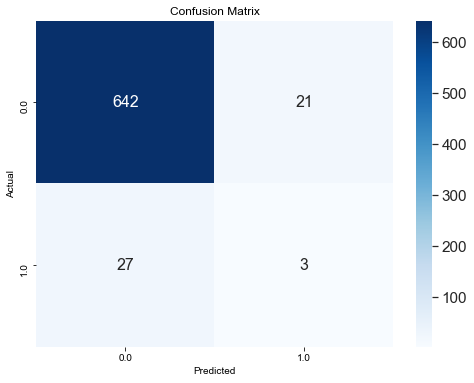

In [28]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(true_y, pred_y, title='Confusion Matrix', figsize=(8,6)):
    """ Custom function for plotting a confusion matrix for predicted results """
    conf_matrix = confusion_matrix(true_y, pred_y)
    conf_df = pd.DataFrame(conf_matrix, columns=np.unique(true_y), index = np.unique(true_y))
    conf_df.index.name = 'Actual'
    conf_df.columns.name = 'Predicted'
    plt.figure(figsize = figsize)
    plt.title(title)
    sns.set(font_scale=1.4)
    sns.heatmap(conf_df, cmap="Blues", annot=True, 
                annot_kws={"size": 16}, fmt='g')
    plt.show()
    return
plot_confusion_matrix(y_test,y_pred)

In [32]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
cross_val_score(lgbm_tuned,x_train_os,y_train_os, scoring='roc_auc', cv=cv, n_jobs=-1).mean()

0.9849612890793262

In [33]:
cross_val_score(lgbm_tuned,x_train_os,y_train_os, scoring='f1', cv=cv, n_jobs=-1).mean()

0.9467879727038244

In [39]:
cross_val_score(lgbm_tuned,x_train,y_train, scoring='f1', cv=cv, n_jobs=-1).mean(),cross_val_score(lgbm_tuned,x_train,y_train, scoring='roc_auc', cv=cv, n_jobs=-1).mean()

(0.0, 0.779849582184775)

In [40]:
### Oversampling worked.